# Introduction to Data Science Project

#### 你是否曾經遇過這樣的困擾?

1. 不知道自己的想法是否可行?
2. 不知道專案一開始該做些什麼?
3. 不知道蒐集完資料後下一步該怎麼做?
5. 不知道卡關了該怎麼辦?
6. 不知道要做到什麼樣的結果才算是完成專案?

#### 接下來，我們將藉由以下幾個實例來告訴大家如何實作，專案該如何進行...
透過  實作案例，讓大家從中理解人工智慧程式的撰寫，培養定義問題、解決問題的關鍵能力。在這個案例中，我們會學到:

1. 資料觀察、分析與視覺化
2. 如何建立深度學習模型
3. 如何評量模型成效與結果視覺化 
4. 如何改善模型成效


下圖為 Microsoft 在 2017 所提出的 Data Science Lifecycle<br> 
![title](./Slides/data_science_lifecycle.png)

![title](./Slides/Business_understanding.png)

## LGP PROJECT Business Understanding


![jupyter](./Slides/1.png)

## Project Process

![jupyter](./Slides/2.png)

- ### Dataset Source
    - AOI设备 取像
- ### Dataset Description
    - 原AOI取像图片size：16382*1200
    - User会将defect位置在原图中label出来（LabelImg）
    - 切图程序 将defect裁切出来成1024*600
    - 将图片按8：2 分train，test
- #### label (4 types):
        - OK   （良品）
        - LLPM (来料破膜)
        - YSBD (印刷白点)
        - YSCQ (印刷残缺)
       

![jupyter](./Slides/7.png)

![jupyter](./Slides/6.png)

![jupyter](./Slides/5.png)

### Python 第一步將所需要的 package 套件、Module 模組匯入進來

In [6]:
import matplotlib.pyplot as plt  # 視覺化呈現
import numpy as np  # 矩陣資料操作
import pandas as pd  # 表格資料處理
import cv2  # 數位影像操作

from tqdm import tqdm  # 進度條
import os  # 操作系統接口
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # 設定使用的 GPU

In [7]:
# 將 tensorflow 底下常用的 function 匯入進來
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.layers import (Input, Dense, Dropout, Activation,
                          Flatten, BatchNormalization, Conv2D,
                          MaxPooling2D, GlobalAveragePooling2D)
from keras.utils import plot_model

Using TensorFlow backend.


![title](./Slides/data_understanding.png)

## Data Acquisition and Understanding

### LGP 資料讀入及前處理

先觀察一下 LGP 資料夾的結構，可以看出是
>資料集<br>
>/LGP_images

>>類別<br>
>>/LLPM<br>
/OK<br>
/YSBD<br>
/YSCQ<br>

In [12]:
# 資料集放置路徑
data_path = r"C:\Users\Administrator\jianjun.qiao\LGP_images\train"  

# 讀入所有檔案路徑
x_data_list = []
y_data_list = []
for roots, dirs, files in os.walk(data_path):
    print(roots)
    if roots.find('check') == -1:
        for each in files:
            x_data_list.append(os.path.join(roots, each))
            y_data_list.append(roots.split("\\")[-1])

C:\Users\Administrator\jianjun.qiao\LGP_images\train
C:\Users\Administrator\jianjun.qiao\LGP_images\train\LLPM
C:\Users\Administrator\jianjun.qiao\LGP_images\train\OK
C:\Users\Administrator\jianjun.qiao\LGP_images\train\YSBD
C:\Users\Administrator\jianjun.qiao\LGP_images\train\YSCQ


In [13]:
x_data_list[:5]

['C:\\Users\\Administrator\\jianjun.qiao\\LGP_images\\train\\LLPM\\LGP-PrintFV-HB-P#6^19_20191226-152337_039392_AIresult.jpg',
 'C:\\Users\\Administrator\\jianjun.qiao\\LGP_images\\train\\LLPM\\LGP-PrintFV-HB-P#6^19_20191227-111639_011006_AIresult.jpg',
 'C:\\Users\\Administrator\\jianjun.qiao\\LGP_images\\train\\LLPM\\LGP-PrintFV-HB-P#6^19_20191227-111639_089128_AIresult.jpg',
 'C:\\Users\\Administrator\\jianjun.qiao\\LGP_images\\train\\LLPM\\LGP-PrintFV-HB-P#6^19_20191227-112025_261316_AIresult.jpg',
 'C:\\Users\\Administrator\\jianjun.qiao\\LGP_images\\train\\LLPM\\LGP-PrintFV-HB-P#6^19_20191227-113027_658047_AIresult.jpg']

In [14]:
y_data_list[:5]

['LLPM', 'LLPM', 'LLPM', 'LLPM', 'LLPM']

### Data Observation

- #### Data visualization

In [15]:
img_size = 256

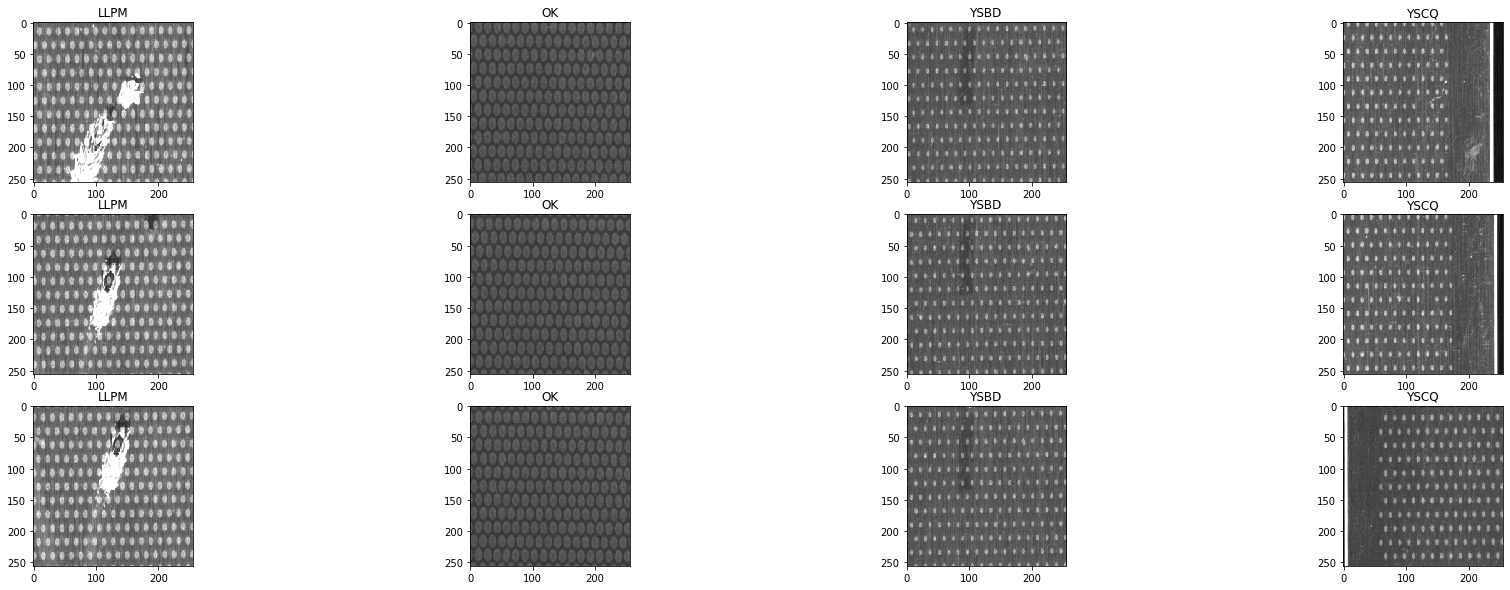

In [16]:
x_data = np.array(x_data_list)
y_data = np.array(y_data_list)

class_num = len(np.unique(y_data))

plt.figure(figsize=(30, 10))

# 觀看各個類別的影像
for j in range(3):
    for i, i_label in list(enumerate(np.unique(y_data_list))):
        x_label = x_data[y_data==i_label]
        img = cv2.imread(x_label[j])
        img = cv2.resize(img[:,:,::-1], (img_size, img_size))
        plt.subplot(3, class_num, j*class_num+i+1)
        plt.imshow(img)
        plt.title(i_label)

- #### Data Distribution

In [17]:
data_list = pd.DataFrame({})
data_list['img_path'] = x_data_list
data_list['label'] = y_data_list

In [18]:
data_list.head(5)

img_path label
0  C:\Users\Administrator\jianjun.qiao\LGP_images...  LLPM
1  C:\Users\Administrator\jianjun.qiao\LGP_images...  LLPM
2  C:\Users\Administrator\jianjun.qiao\LGP_images...  LLPM
3  C:\Users\Administrator\jianjun.qiao\LGP_images...  LLPM
4  C:\Users\Administrator\jianjun.qiao\LGP_images...  LLPM

In [19]:
uniques = data_list['label'].value_counts().index  # 共有幾個類別
counts = data_list['label'].value_counts().values  # 每個類別的數量

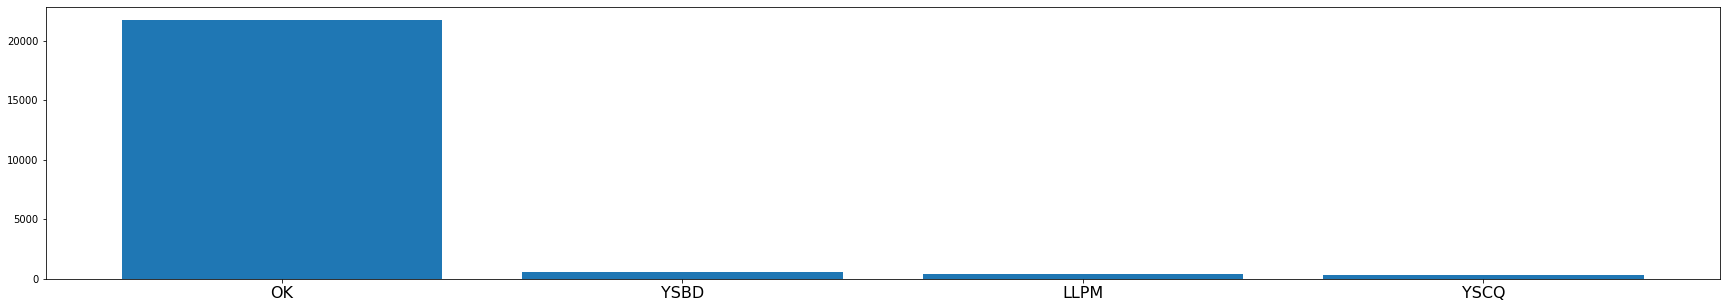

In [20]:
# 利用長條圖將各類別的分布繪製出來
plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=16)
plt.show()

### Data Preparation
- #### Split dataset to train and validation dataset

![title](./Slides/train_test_split.PNG)

## Why? To avoid overfitting!
![overfitting](https://miro.medium.com/max/694/1*tBErXYVvTw2jSUYK7thU2A.png)
Figure credit: Adi Bronshtein, Data Scientist & Data Science Instructor at General Assembly, D.C.

In [21]:
from sklearn.model_selection import train_test_split

train_list, valid_list = train_test_split(data_list,
                                          test_size=0.1,
                                          random_state=10,
                                          stratify=data_list['label'])

train_list = train_list.reset_index(drop=True)
valid_list = valid_list.reset_index(drop=True)

#### The distribution of validation data

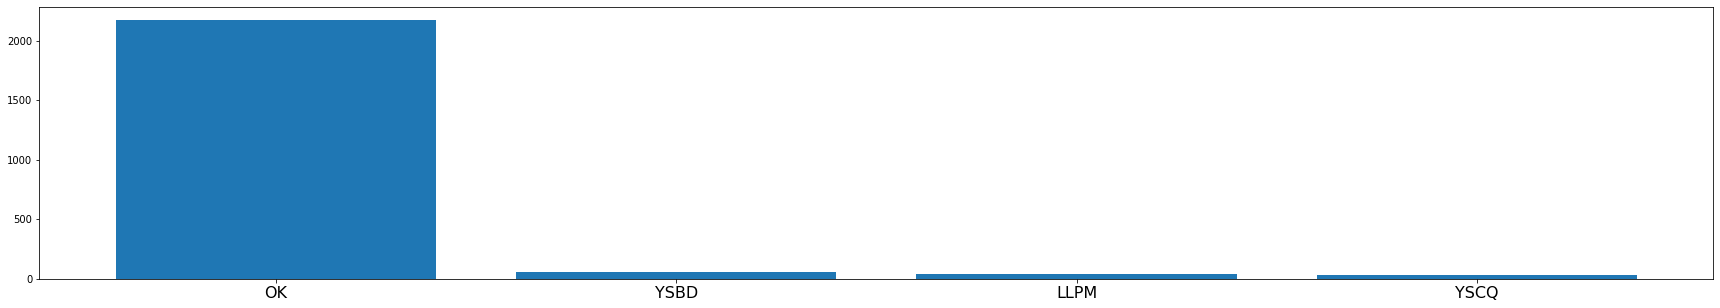

In [22]:
val_uniques = valid_list['label'].value_counts().index
val_counts = valid_list['label'].value_counts().values

plt.figure(figsize=(30, 5))
plt.bar(val_uniques, val_counts)
plt.xticks(fontsize=16)
plt.show()

In [23]:
num_classes = len(uniques)
print(num_classes)

4


### Data Preparation
- #### Data Generator

In [28]:
# 每次產生資料前會做的資料前處理
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
# 從 Dataframe 讀入影像以及其標籤
train_generator = train_datagen.flow_from_dataframe(dataframe=train_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 25429 validated image filenames belonging to 4 classes.
Found 2826 validated image filenames belonging to 4 classes.


![title](./Slides/modeling_1.png)

### Modeling - Feature engineering

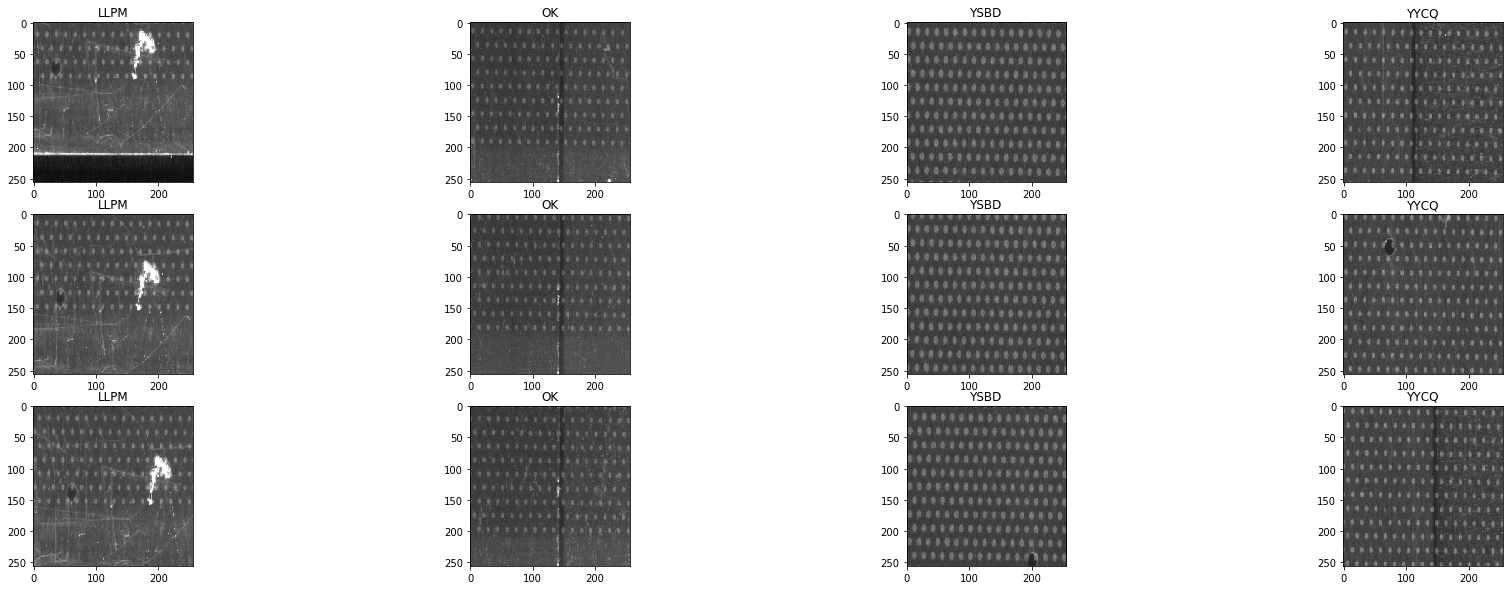

In [30]:
x_data = np.array(x_data_list)
y_data = np.array(y_data_list)

class_num = len(np.unique(y_data))

plt.figure(figsize=(30, 10))

# 觀看各個類別的影像
for j in range(3):
    for i, i_label in list(enumerate(np.unique(y_data_list))):
        x_label = x_data[y_data==i_label]
        img = cv2.imread(x_label[j])
        img = cv2.resize(img[:,:,::-1], (img_size, img_size))
        plt.subplot(3, class_num, j*class_num+i+1)
        plt.imshow(img)
        plt.title(i_label)

#### **什麼樣的特徵有助於分辨defect的類別**
- 顏色？
- 图片大小？
- 解析度？
- ...？

#### **灰階圖**

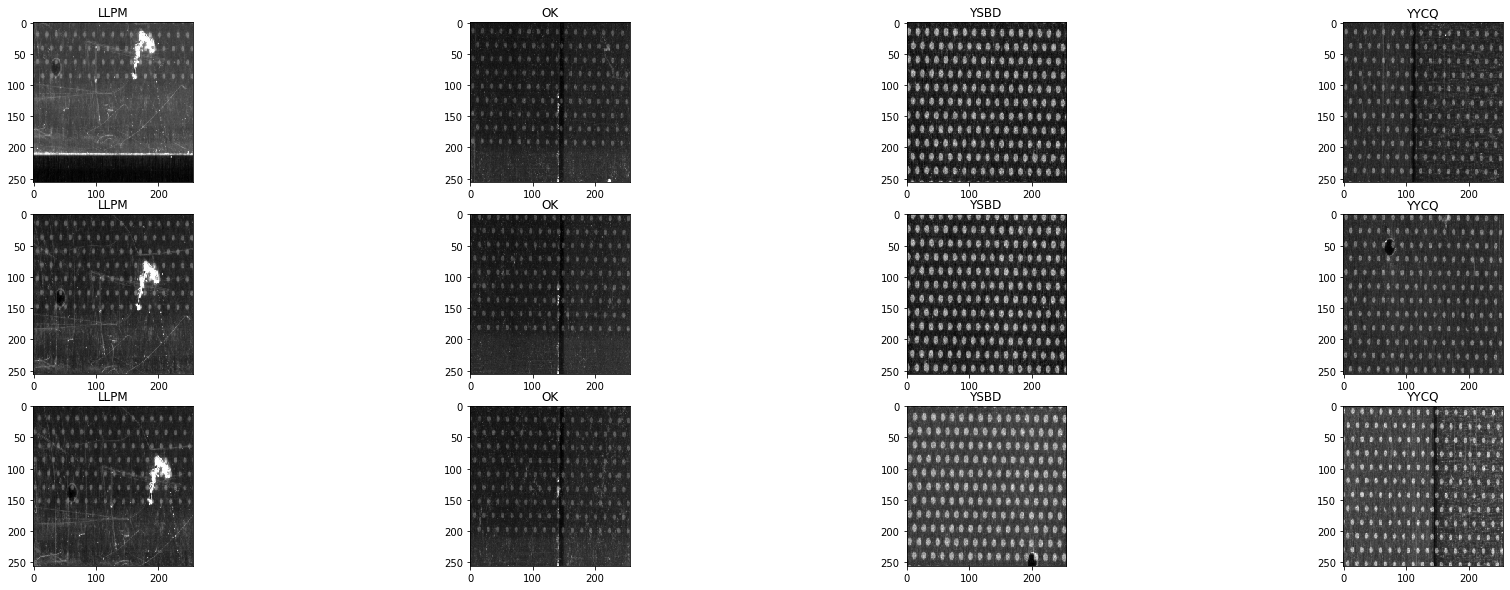

In [31]:
x_data = np.array(x_data_list)
y_data = np.array(y_data_list)

class_num = len(np.unique(y_data))

plt.figure(figsize=(30, 10))

# 觀看各個類別的影像
for j in range(3):
    for i, i_label in list(enumerate(np.unique(y_data_list))):
        x_label = x_data[y_data==i_label]
        img = cv2.imread(x_label[j])
        img = cv2.resize(img[:,:,::-1], (img_size, img_size))
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#         eq = cv2.equalizeHist(gray)
        
        plt.subplot(3, class_num, j*class_num+i+1)
        plt.imshow(gray, cmap='gray')
        plt.title(i_label)

#### **影像增強 (增加對比度)**

- Histogram Equalization
![title](./Slides/histogram_equal.PNG)

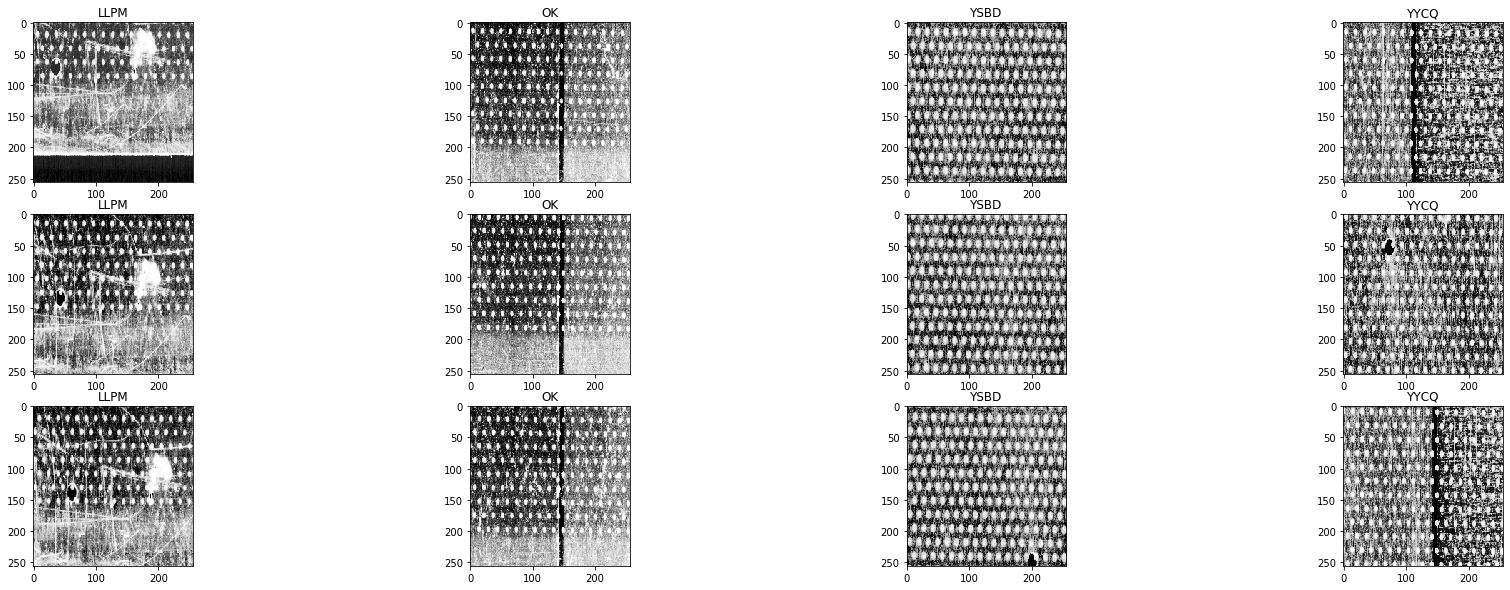

In [32]:
x_data = np.array(x_data_list)
y_data = np.array(y_data_list)

class_num = len(np.unique(y_data))

plt.figure(figsize=(30, 10))

# 觀看各個類別的影像
for j in range(3):
    for i, i_label in list(enumerate(np.unique(y_data_list))):
        x_label = x_data[y_data==i_label]
        img = cv2.imread(x_label[j])
        img = cv2.resize(img[:,:,::-1], (img_size, img_size))
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        eq = cv2.equalizeHist(gray)
        
        plt.subplot(3, class_num, j*class_num+i+1)
        plt.imshow(eq, cmap='gray')
        plt.title(i_label)

#### **影像增強再取輪廓**

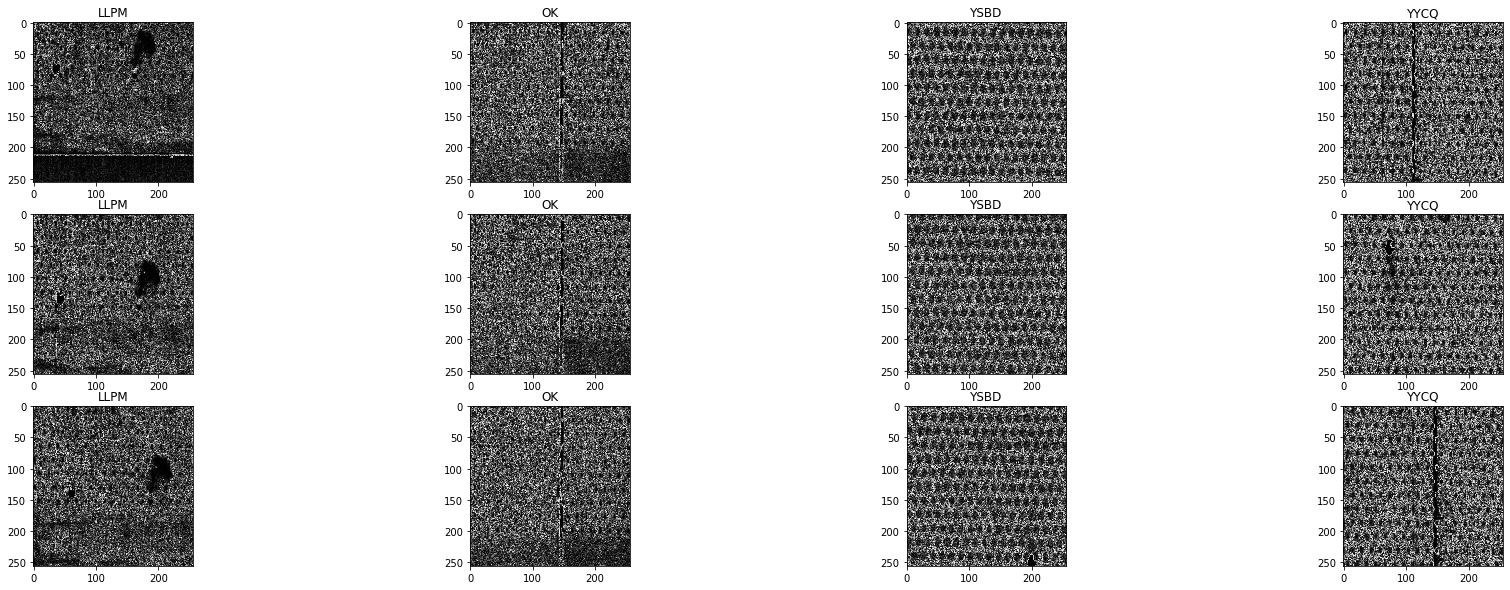

In [33]:
x_data = np.array(x_data_list)
y_data = np.array(y_data_list)

class_num = len(np.unique(y_data))

plt.figure(figsize=(30, 10))

# 觀看各個類別的影像
for j in range(3):
    for i, i_label in list(enumerate(np.unique(y_data_list))):
        x_label = x_data[y_data==i_label]
        img = cv2.imread(x_label[j])
        img = cv2.resize(img[:,:,::-1], (img_size, img_size))
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        eq = cv2.equalizeHist(gray)
        lap = cv2.Laplacian(eq, cv2.CV_64F)
        lap = np.uint8(np.absolute(lap)).astype('float64')
        plt.subplot(3, class_num, j*class_num+i+1)
        plt.imshow(lap, cmap='gray')
        plt.title(i_label)

In [34]:
def my_preprocess(img):
    img = np.array(img)
    eq = cv2.equalizeHist(img.astype('uint8'))
    
    return np.expand_dims(eq.astype('float64'), axis=-1)

In [35]:
# 每次產生資料前會做的資料前處理
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=my_preprocess)
valid_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=my_preprocess)

In [36]:
# 從 Dataframe 讀入影像以及其標籤
train_generator = train_datagen.flow_from_dataframe(dataframe=train_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 25429 validated image filenames belonging to 4 classes.
Found 2826 validated image filenames belonging to 4 classes.


In [37]:
# 產生器自動將類別編碼
train_generator.class_indices

{'LLPM': 0, 'OK': 1, 'YSBD': 2, 'YYCQ': 3}

data shape: (32, 256, 256, 1)
label shape: (32, 4)

first five data:


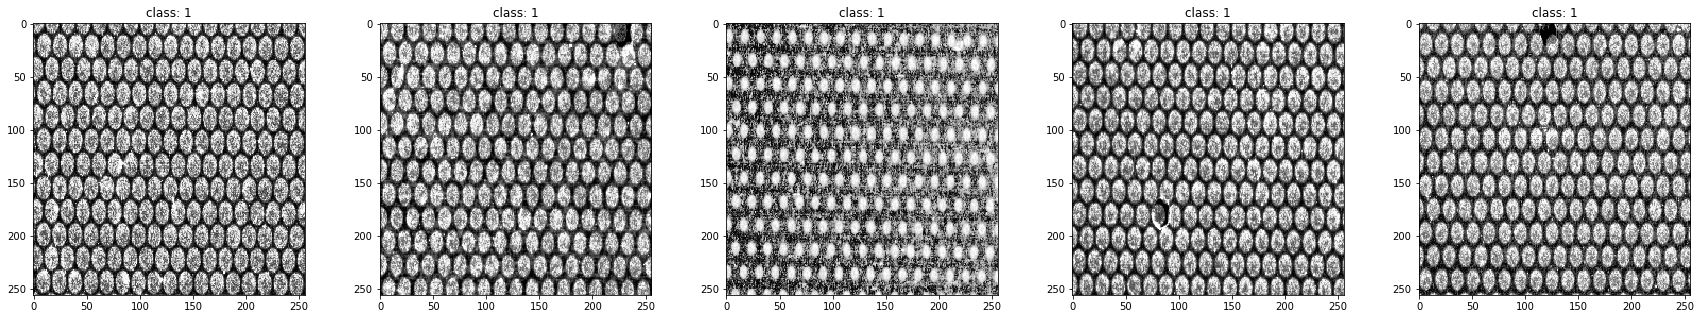

In [38]:
# 觀看每一次會產生的資料
x, y = train_generator.next()
print('data shape:', x.shape)
print('label shape:', y.shape)
plt.figure(figsize=(30, 5))
print('\nfirst five data:')
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x[i,:,:,0], cmap='gray')
    plt.title('class: '+str(np.argmax(y[i])))

In [39]:
y[:5]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

![title](./Slides/one_hot_encoding.png)

![title](./Slides/modeling_2.png)

## Modeling - model training

![title](./Slides/deeper_network.png)

![title](./Slides/image_in_FC.png)

![title](./Slides/convolutional_layer.png)

![title](./Slides/CNN_structure.png)

![title](./Slides/step_for_build_model.png)

In [40]:
def build_model(img_size):
    inputs = Input(shape=(img_size, img_size, 1))

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Flatten()(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [44]:
keras.backend.clear_session()
model = build_model(img_size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [46]:
#plot_model(model, to_file='model.png', show_shapes=True)

![title](./Slides/categorical_classification_loss.png)

![title](./Slides/classification_loss_2.png)

In [48]:
# 編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-4),
              metrics=['acc'])

In [49]:
# 訓練參數設定
batch_size = 32
epochs = 20

In [50]:
# 訓練模型
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_list.shape[0]//batch_size,
                              epochs=epochs,
                              validation_data=valid_generator)

Epoch 1/20
794/794 [==============================] - 674s 849ms/step - loss: 0.3324 - acc: 0.9193 - val_loss: 0.3311 - val_acc: 0.9030
Epoch 2/20
794/794 [==============================] - 110s 139ms/step - loss: 0.2322 - acc: 0.9319 - val_loss: 0.2600 - val_acc: 0.9306
Epoch 3/20
794/794 [==============================] - 111s 139ms/step - loss: 0.1804 - acc: 0.9450 - val_loss: 0.1826 - val_acc: 0.9434
Epoch 4/20
794/794 [==============================] - 109s 137ms/step - loss: 0.1437 - acc: 0.9551 - val_loss: 0.1720 - val_acc: 0.9473
Epoch 5/20
794/794 [==============================] - 108s 137ms/step - loss: 0.1096 - acc: 0.9645 - val_loss: 0.1693 - val_acc: 0.9519
Epoch 6/20
794/794 [==============================] - 108s 136ms/step - loss: 0.0746 - acc: 0.9759 - val_loss: 0.1750 - val_acc: 0.9540
Epoch 7/20
794/794 [==============================] - 108s 137ms/step - loss: 0.0466 - acc: 0.9848 - val_loss: 0.2428 - val_acc: 0.9522
Epoch 8/20
794/794 [============================

In [51]:
import tensorflow as tf
sess = tf.Session()
sess.run(tf.global_variables_initializer())

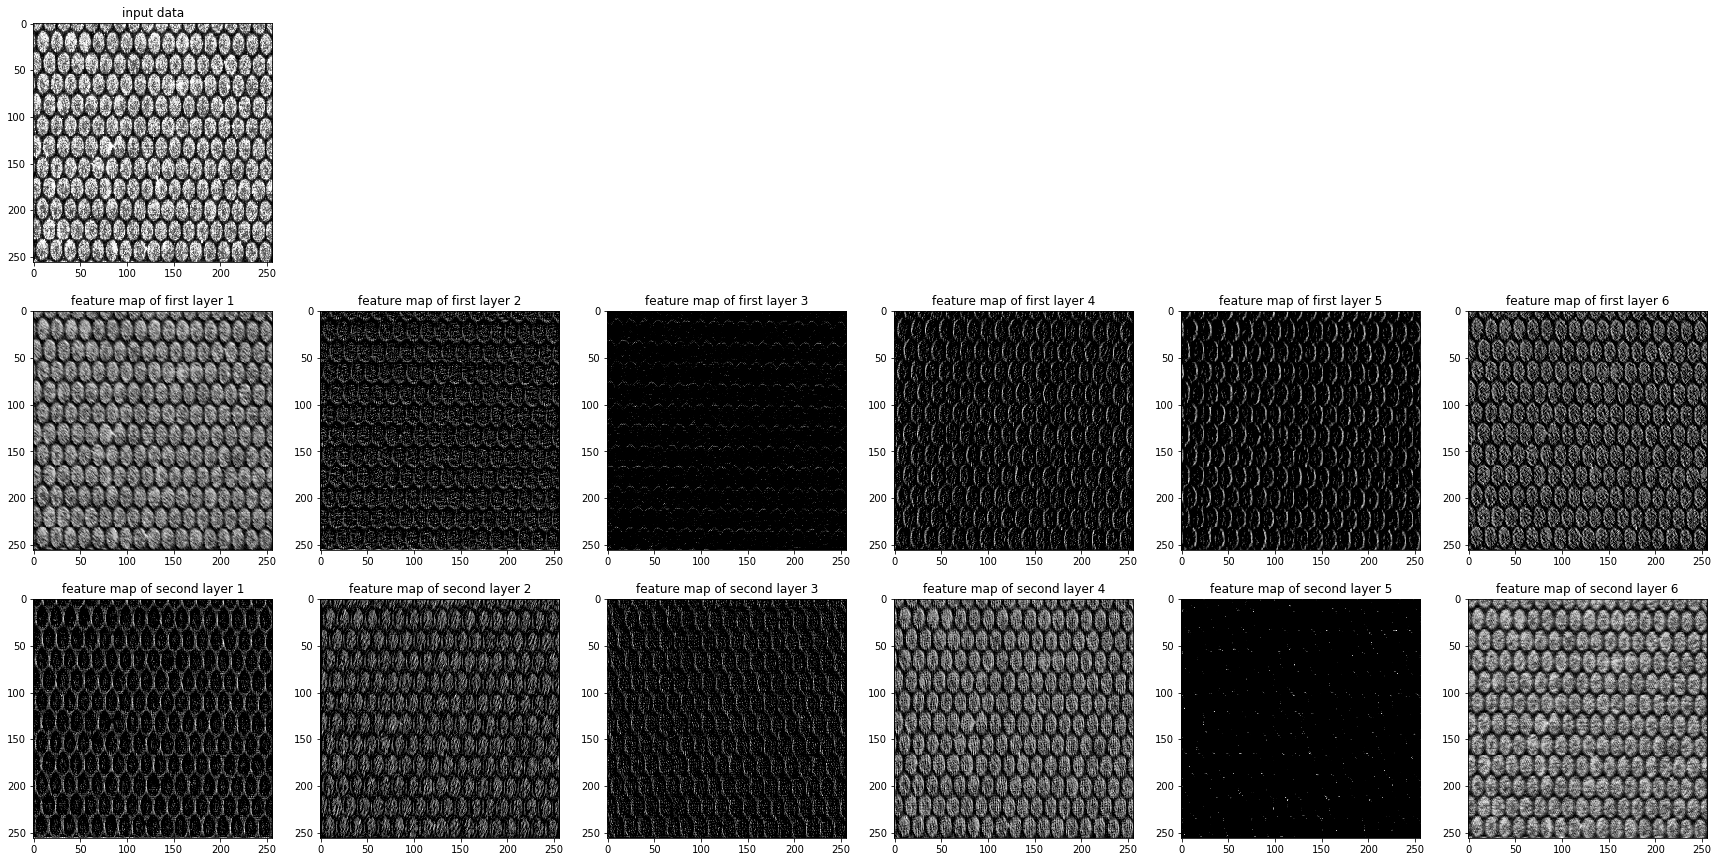

In [52]:
# 從 feature map 可以觀看到神經網路在擷取哪些特徵
num = 0
plt.figure(figsize=(30, 15))
plt.subplot(3, 6, 1)
plt.title('input data')
plt.imshow(x[num,:,:,0], cmap='gray')

feature_1 = model.layers[1](tf.constant(x, dtype='float32')).eval(session=sess)
for i in range(6):
    plt.subplot(3, 6, 6+i+1)
    plt.imshow(feature_1[num][:,:,i], cmap='gray')
    plt.title('feature map of first layer '+str(i+1))

feature_2 = model.layers[2](model.layers[1](tf.constant(x, dtype='float32'))).eval(session=sess)
for i in range(6):
    plt.subplot(3, 6, 12+i+1)
    plt.imshow(feature_2[num][:,:,i], cmap='gray')
    plt.title('feature map of second layer '+str(i+1))

![title](./Slides/modeling_3.png)

## Modeling - Model evaluation

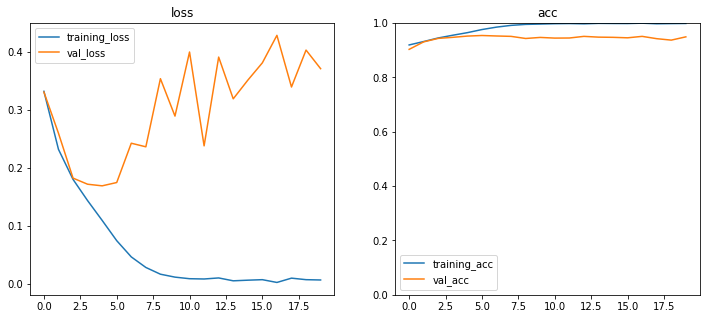

In [53]:
# 將訓練過程做視覺化的呈現
train_history = ['loss', 'val_loss', 'acc', 'val_acc']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title(eachy.split('_')[1])
    if i>2:
        plt.ylim((0, 1))
plt.show()

![title](./Slides/Tips_for_training.png)

#### Overfitting Occured
從圖示化的結果可以很明顯看到驗證集不如訓練集上的表現...

![title](./Slides/overfitting_factor.png)

#### Reduce the complexity of model
- ##### Regularization

![title](./Slides/regularization_2.png)

![title](./Slides/regularization_1.png)

In [54]:
from keras.regularizers import l2
def build_model_regularization(img_size):
    inputs = Input(shape=(img_size, img_size, 1))

    x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(inputs)
    x = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)


    model = Model(inputs=inputs, outputs=outputs)
    return model

- ##### Earlystopping

![title](./Slides/early_stopping.png)

In [55]:
earlystop = keras.callbacks.EarlyStopping(monitor='val_acc',
                                          patience=5,
                                          verbose=0)

- ##### Dropout

![title](./Slides/dropout.png)

In [56]:
# 建構模型，利用 Dropout 降低模型的複雜度
def build_model_dropout(img_size):
    inputs = Input(shape=(img_size, img_size, 1))

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
    
    x = Flatten()(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [57]:
keras.backend.clear_session()
model = build_model_dropout(img_size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      36928     
__________

In [58]:
# 編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['acc'])

In [59]:
# 參數設定
batch_size = 32
epochs = 20

# 訓練模型
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_list.shape[0]//batch_size,
                              epochs=epochs,
                              validation_data=valid_generator)

Epoch 1/20
794/794 [==============================] - 107s 135ms/step - loss: 0.3611 - acc: 0.9160 - val_loss: 0.3076 - val_acc: 0.9172
Epoch 2/20
794/794 [==============================] - 107s 135ms/step - loss: 0.2724 - acc: 0.9202 - val_loss: 0.2993 - val_acc: 0.9197
Epoch 3/20
794/794 [==============================] - 106s 134ms/step - loss: 0.2351 - acc: 0.9297 - val_loss: 0.2350 - val_acc: 0.9356
Epoch 4/20
794/794 [==============================] - 107s 134ms/step - loss: 0.2085 - acc: 0.9383 - val_loss: 0.2051 - val_acc: 0.9430
Epoch 5/20
794/794 [==============================] - 107s 134ms/step - loss: 0.1771 - acc: 0.9455 - val_loss: 0.1825 - val_acc: 0.9423
Epoch 6/20
794/794 [==============================] - 107s 135ms/step - loss: 0.1485 - acc: 0.9529 - val_loss: 0.1660 - val_acc: 0.9508
Epoch 7/20
794/794 [==============================] - 107s 134ms/step - loss: 0.1284 - acc: 0.9588 - val_loss: 0.1651 - val_acc: 0.9483
Epoch 8/20
794/794 [============================

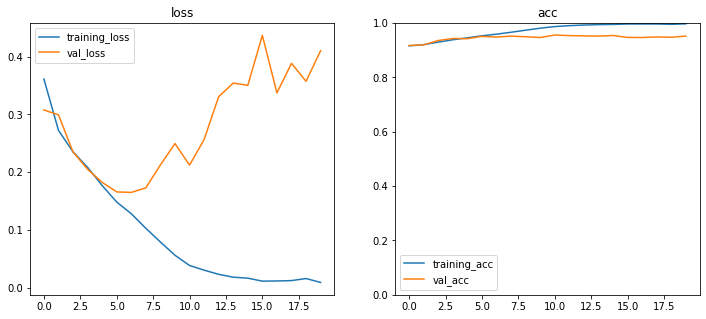

In [60]:
# 將訓練過程做視覺化的呈現
train_history = ['loss', 'val_loss', 'acc', 'val_acc']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title(eachy.split('_')[1])
    if i>2:
        plt.ylim((0, 1))
plt.show()

![title](./Slides/Business_understanding_2.png)

![title](./Slides/data_understanding_2.png)

#### Data Augumentation

![title](./Slides/data_augmentation.png)

In [61]:
# 每次產生資料前會做的資料前處理
train_datagen = ImageDataGenerator(width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   rescale=1./255,
                                   preprocessing_function=my_preprocess)

valid_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=my_preprocess)

In [62]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 25429 validated image filenames belonging to 4 classes.
Found 2826 validated image filenames belonging to 4 classes.


data shape: (32, 256, 256, 1)
label shape: (32, 4)

first five data:


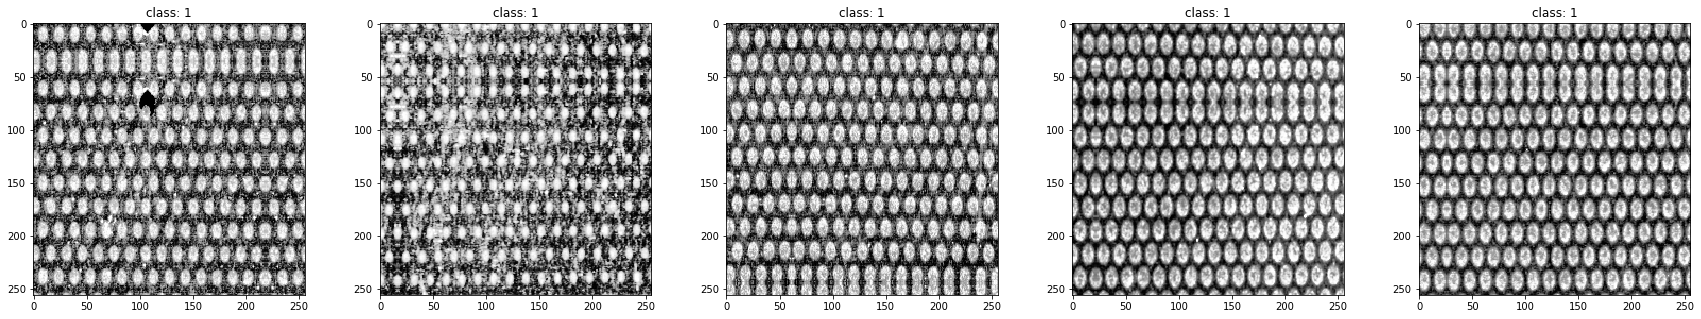

In [63]:
# 觀看每一次會產生的資料
x, y = train_generator.next()
print('data shape:', x.shape)
print('label shape:', y.shape)
plt.figure(figsize=(30, 5))
print('\nfirst five data:')
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x[i,:,:,0], cmap='gray')
    plt.title('class: '+str(np.argmax(y[i])))

In [65]:
keras.backend.clear_session()
model = build_model(img_size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [66]:
# 編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['acc'])

In [67]:
# Callbacks
model_dir = './Model/model-logs'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


modelfiles = model_dir + '/{}-best-model.h5'.format('basic_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_acc',
                                             verbose=1, 
                                             save_best_only=True)

callbacks_list = [model_mckp]

In [75]:
# 參數設定
batch_size = 32
epochs = 20

#訓練模型
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_list.shape[0]//batch_size,
                              epochs=epochs,
                              validation_data=valid_generator,
                              callbacks=callbacks_list)

Epoch 1/20
794/794 [==============================] - 178s 224ms/step - loss: 0.1511 - acc: 0.9538 - val_loss: 0.1650 - val_acc: 0.9505

Epoch 00001: val_acc did not improve from 0.95789
Epoch 2/20
794/794 [==============================] - 176s 222ms/step - loss: 0.1521 - acc: 0.9533 - val_loss: 0.1457 - val_acc: 0.9568

Epoch 00002: val_acc did not improve from 0.95789
Epoch 3/20
794/794 [==============================] - 175s 220ms/step - loss: 0.1451 - acc: 0.9544 - val_loss: 0.1919 - val_acc: 0.9455

Epoch 00003: val_acc did not improve from 0.95789
Epoch 4/20
794/794 [==============================] - 177s 223ms/step - loss: 0.1399 - acc: 0.9560 - val_loss: 0.1567 - val_acc: 0.9561

Epoch 00004: val_acc did not improve from 0.95789
Epoch 5/20
794/794 [==============================] - 181s 227ms/step - loss: 0.1416 - acc: 0.9563 - val_loss: 0.1704 - val_acc: 0.9466

Epoch 00005: val_acc did not improve from 0.95789
Epoch 6/20
794/794 [==============================] - 174s 219ms/

#### Result visualization

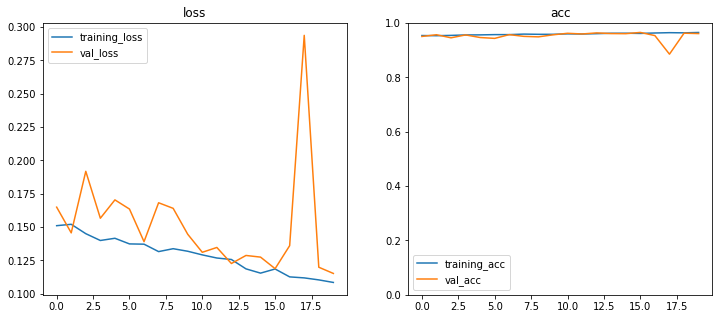

In [76]:
train_history = ['loss', 'val_loss', 'acc', 'val_acc']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title(eachy.split('_')[1])
    if i>2:
        plt.ylim((0, 1))
plt.show()

#### Model evaluation

In [77]:
model = load_model('./Model/model-logs/basic_model-best-model.h5')

In [78]:
valid_pred = model.predict_generator(valid_generator)
valid_pred = valid_pred.argmax(-1)

In [79]:
valid_generator.class_indices

{'LLPM': 0, 'OK': 1, 'YSBD': 2, 'YYCQ': 3}

In [80]:
valid_list['generator_label'] = valid_list['label'].map(valid_generator.class_indices).values

![title](./Slides/metrics.png)

- #### Accuracy

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(valid_list['generator_label'], valid_pred))

0.9653220099079972


- #### Confusion Matrix

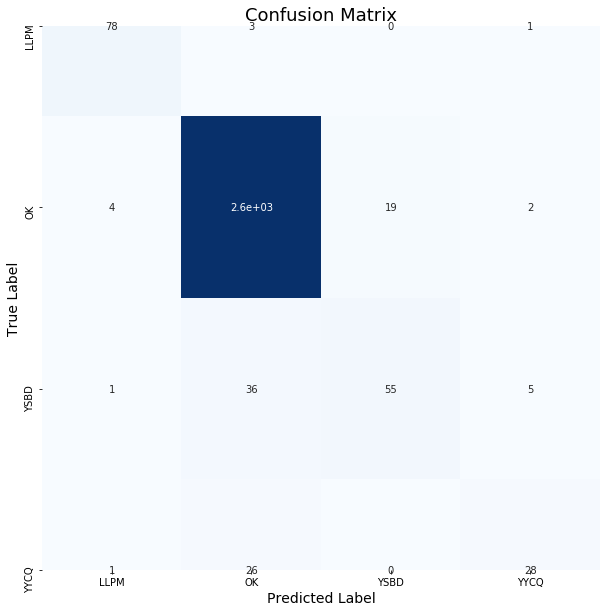

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(valid_list['generator_label'], valid_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues", robust=True,
            xticklabels=valid_generator.class_indices.keys(),
            yticklabels=valid_generator.class_indices.keys())
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

- #### Recall

In [85]:
from sklearn.metrics import recall_score
dict(zip(valid_generator.class_indices.keys(), recall_score(valid_list['generator_label'], valid_pred, average=None)))

{'LLPM': 0.9512195121951219,
 'OK': 0.9903549382716049,
 'YSBD': 0.5670103092783505,
 'YYCQ': 0.509090909090909}

#### Deal with Imbalanced Data

In [86]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_generator.classes), 
                train_generator.classes)

In [87]:
class_weights

array([ 8.56772237,  0.27257428,  7.33246828, 12.79124748])

In [88]:
# 重複取樣
new_train_list = train_list.copy()
for i in list(train_generator.class_indices.keys()):
    repeat_times = int(np.round((class_weights[train_generator.class_indices[i]])/class_weights.min()))
    print(i, ':', repeat_times)
    for j in range(repeat_times-1):
        new_train_list = pd.concat((new_train_list, train_list[train_list['label']==i]))

LLPM : 31
OK : 1
YSBD : 27
YYCQ : 47


#### Observe the distribution of training data

In [89]:
uniques = new_train_list['label'].value_counts().index
counts = new_train_list['label'].value_counts().values

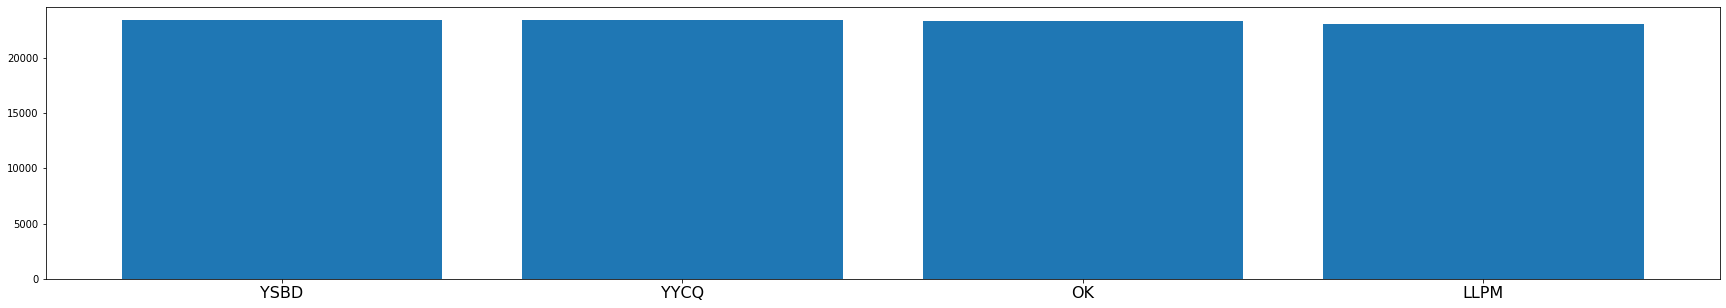

In [90]:
plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=16)
plt.show()

In [91]:
train_datagen = ImageDataGenerator(width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   rescale=1./255, preprocessing_function=my_preprocess)

valid_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=my_preprocess)

In [92]:
train_generator = train_datagen.flow_from_dataframe(dataframe=new_train_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 93093 validated image filenames belonging to 4 classes.
Found 2826 validated image filenames belonging to 4 classes.


In [93]:
keras.backend.clear_session()
model = build_model(img_size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [94]:
# 編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['acc'])

In [95]:
# Callbacks
model_dir = './Model/model-logs'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


modelfiles = model_dir + '/{}-best-model.h5'.format('basic_model_balanced')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_acc',
                                             verbose=1, 
                                             save_best_only=True)

callbacks_list = [model_mckp]

In [96]:
# 參數設定
batch_size = 32
epochs = 20

# 訓練模型
history = model.fit_generator(train_generator,
                              steps_per_epoch=new_train_list.shape[0]//batch_size,
                              epochs=epochs,
                              validation_data=valid_generator,
                              callbacks=callbacks_list)

Epoch 1/20
2909/2909 [==============================] - 641s 220ms/step - loss: 0.9092 - acc: 0.5797 - val_loss: 0.7814 - val_acc: 0.6192

Epoch 00001: val_acc improved from -inf to 0.61925, saving model to ./Model/model-logs/basic_model_balanced-best-model.h5
Epoch 2/20
2909/2909 [==============================] - 634s 218ms/step - loss: 0.5846 - acc: 0.7655 - val_loss: 0.3151 - val_acc: 0.8786

Epoch 00002: val_acc improved from 0.61925 to 0.87863, saving model to ./Model/model-logs/basic_model_balanced-best-model.h5
Epoch 3/20
2909/2909 [==============================] - 640s 220ms/step - loss: 0.4196 - acc: 0.8425 - val_loss: 0.3273 - val_acc: 0.8917

Epoch 00003: val_acc improved from 0.87863 to 0.89172, saving model to ./Model/model-logs/basic_model_balanced-best-model.h5
Epoch 4/20
2909/2909 [==============================] - 633s 218ms/step - loss: 0.3176 - acc: 0.8851 - val_loss: 0.3553 - val_acc: 0.8708

Epoch 00004: val_acc did not improve from 0.89172
Epoch 5/20
2909/2909 [

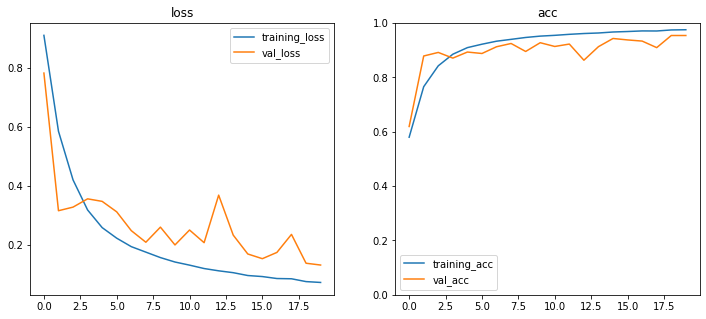

In [97]:
# 將訓練過程做視覺化的呈現
train_history = ['loss', 'val_loss', 'acc', 'val_acc']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title(eachy.split('_')[1])
    if i>2:
        plt.ylim((0, 1))
plt.show()

#### Model evaluation

In [98]:
model = load_model('./Model/model-logs/basic_model_balanced-best-model.h5')

In [99]:
valid_pred = model.predict_generator(valid_generator)
valid_pred = valid_pred.argmax(-1)

In [100]:
valid_list['generator_label'] = valid_list['label'].map(valid_generator.class_indices).values

- #### Accuracy

In [101]:
print(accuracy_score(valid_list['generator_label'], valid_pred))

0.953998584571833


- #### Confusion Matrix

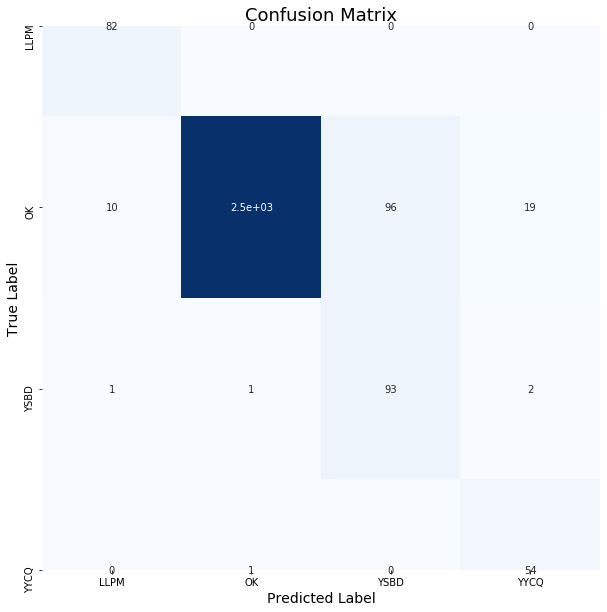

In [102]:
matrix = confusion_matrix(valid_list['generator_label'], valid_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues", robust=True,
            xticklabels=valid_generator.class_indices.keys(),
            yticklabels=valid_generator.class_indices.keys())
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

- #### Recall

In [103]:
from sklearn.metrics import recall_score
dict(zip(valid_generator.class_indices.keys(), recall_score(valid_list['generator_label'], valid_pred, average=None)))

{'LLPM': 1.0,
 'OK': 0.9517746913580247,
 'YSBD': 0.9587628865979382,
 'YYCQ': 0.9818181818181818}

## Famous CNN models

![title](./Slides/keras_applications.PNG)

#### Residual block

![title](./Slides/resnet.png)

#### Inception module

![title](./Slides/inception.png)

### **Transfer learning**

![title](./Slides/transfer_learning.png)

![title](./Slides/kernel_visualization.jpeg)

![title](./Slides/keras_applications.PNG)

#### VGG16

In [104]:
from keras.applications.vgg16 import VGG16, preprocess_input

![title](./Slides/vgg16.png)

In [105]:
def transfer_preprocess(img):
    img = np.array(img).astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    eq = np.expand_dims(cv2.equalizeHist(img), axis=-1)
    img = np.repeat(eq, 3, axis=2).astype('float32')
    return preprocess_input(img)

In [106]:
train_datagen = ImageDataGenerator(width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   rescale=1./255,
                                   preprocessing_function=transfer_preprocess)

valid_datagen = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=transfer_preprocess)

In [107]:
train_generator = train_datagen.flow_from_dataframe(dataframe=new_train_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 93093 validated image filenames belonging to 4 classes.
Found 2826 validated image filenames belonging to 4 classes.


data shape: (32, 256, 256, 3)
label shape: (32, 4)

first five data:


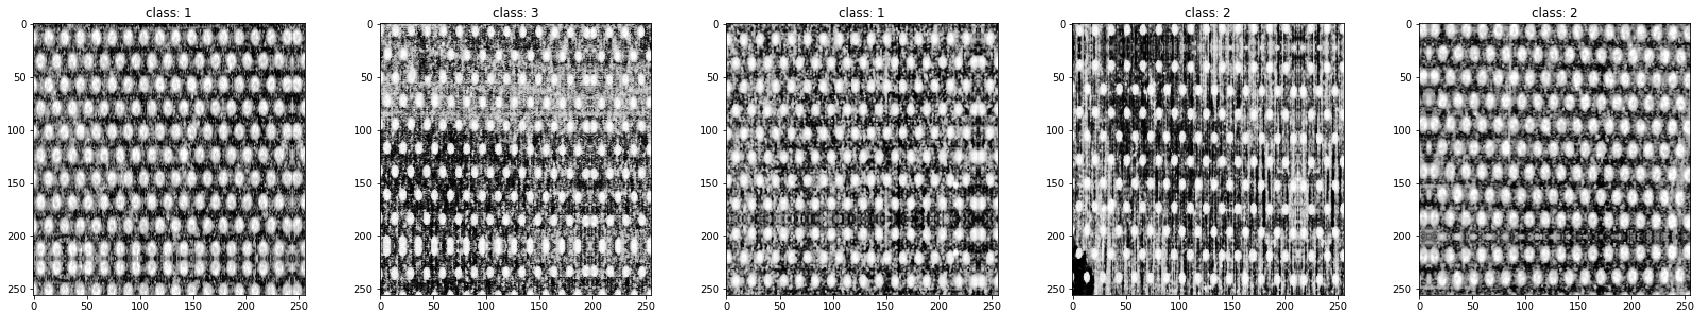

In [108]:
# 觀看每一次會產生的資料
x, y = train_generator.next()
print('data shape:', x.shape)
print('label shape:', y.shape)
plt.figure(figsize=(30, 5))
print('\nfirst five data:')
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x[i,:,:,0], cmap='gray')
    plt.title('class: '+str(np.argmax(y[i])))

In [109]:
def vgg_model(img_size):
    # convolution layer (using the weight trained by ImageNet to extract feature)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
    
    # Freeze layers without training
    trainable_layer = 4
    for layer in base_model.layers[:-trainable_layer]:
        layer.trainable = False
    
    # Fully-connected layer (classification)
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.inputs, outputs=outputs)
    return model

In [110]:
model_dir = './Model/model-logs'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


modelfiles = model_dir + '/{}-best-model.h5'.format('transfer_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_acc',
                                             verbose=1, 
                                             save_best_only=True)

callbacks_list = [model_mckp]

In [111]:
keras.backend.clear_session()
model = vgg_model(img_size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [112]:
# 編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['acc'])

In [113]:
# 參數設定
batch_size = 32
epochs = 20

# 訓練模型
history = model.fit_generator(train_generator,
                              steps_per_epoch=new_train_list.shape[0]//batch_size,
                              epochs=epochs,
                              validation_data=valid_generator,
                              callbacks=callbacks_list)

Epoch 1/20
2909/2909 [==============================] - 1235s 424ms/step - loss: 0.4355 - acc: 0.8363 - val_loss: 0.4143 - val_acc: 0.8301

Epoch 00001: val_acc improved from -inf to 0.83015, saving model to ./Model/model-logs/transfer_model-best-model.h5
Epoch 2/20
2909/2909 [==============================] - 1238s 426ms/step - loss: 0.2403 - acc: 0.9143 - val_loss: 0.2627 - val_acc: 0.8868

Epoch 00002: val_acc improved from 0.83015 to 0.88677, saving model to ./Model/model-logs/transfer_model-best-model.h5
Epoch 3/20
2909/2909 [==============================] - 1236s 425ms/step - loss: 0.1902 - acc: 0.9331 - val_loss: 0.2418 - val_acc: 0.9115

Epoch 00003: val_acc improved from 0.88677 to 0.91154, saving model to ./Model/model-logs/transfer_model-best-model.h5
Epoch 4/20
2909/2909 [==============================] - 1237s 425ms/step - loss: 0.1647 - acc: 0.9417 - val_loss: 0.1476 - val_acc: 0.9437

Epoch 00004: val_acc improved from 0.91154 to 0.94374, saving model to ./Model/model-l

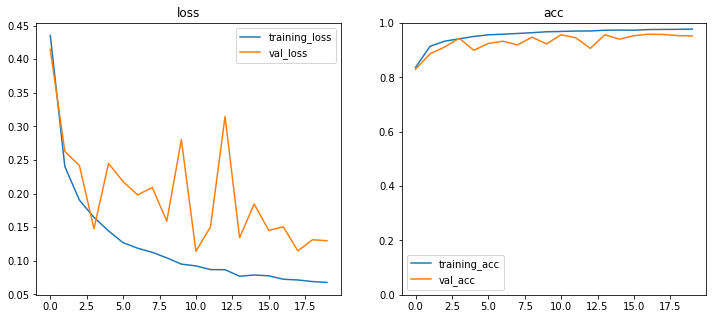

In [127]:
# 將訓練過程做視覺化的呈現
train_history = ['loss', 'val_loss', 'acc', 'val_acc']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title(eachy.split('_')[1])
    if i>2:
        plt.ylim((0, 1))
plt.show()

#### Model evaluation

In [128]:
model = load_model('./Model/model-logs/transfer_model-best-model.h5')

In [129]:
valid_pred = model.predict_generator(valid_generator)
valid_pred = valid_pred.argmax(-1)

In [130]:
valid_list.loc[:, 'generator_label'] = valid_list['label'].map(valid_generator.class_indices).values

- #### Accuracy

In [131]:
print('Accuracy:', accuracy_score(valid_list['generator_label'], valid_pred))

Accuracy: 0.9585987261146497


- #### Confusion matrix

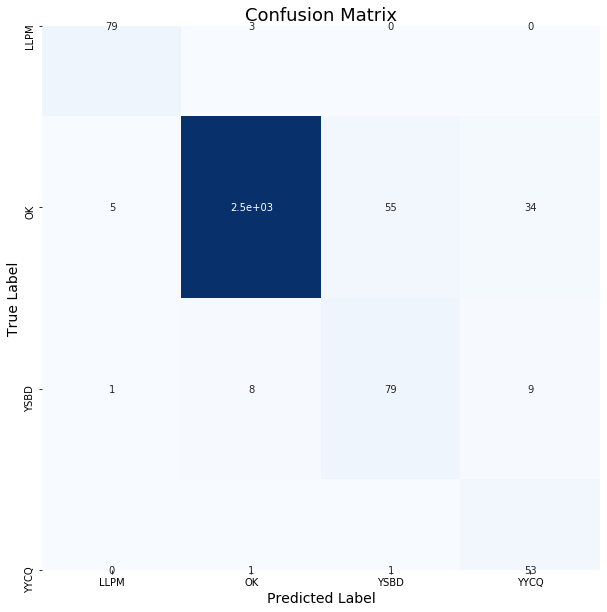

In [132]:
matrix = confusion_matrix(valid_list['generator_label'], valid_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues", robust=True,
            xticklabels=valid_generator.class_indices.keys(),
            yticklabels=valid_generator.class_indices.keys())
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

- #### Recall

In [133]:
dict(zip(valid_generator.class_indices.keys(), recall_score(valid_list['generator_label'], valid_pred, average=None)))

{'LLPM': 0.9634146341463414,
 'OK': 0.9637345679012346,
 'YSBD': 0.8144329896907216,
 'YYCQ': 0.9636363636363636}

#### EfficientNet
号称最好的分类网络

![title](./Slides/efficient_comparison.png)

![title](./Slides/efficient.png)

In [141]:
#from efficientnet.keras import EfficientNetB0, preprocess_input
from keras_efficientnets import EfficientNetB0, BlockArgs,preprocess_input

In [142]:
train_datagen = ImageDataGenerator(width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='wrap',
                                   rescale=1./255,
                                   preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=preprocess_input)

In [143]:
train_generator = train_datagen.flow_from_dataframe(dataframe=new_train_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_list,
                                                    directory='',
                                                    x_col="img_path",
                                                    y_col="label",
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 93093 validated image filenames belonging to 4 classes.
Found 2826 validated image filenames belonging to 4 classes.


In [151]:
def effnet():
    base_model = EfficientNetB0(weights='imagenet',include_top=False)
    base_model.trainable = False
    pool = keras.layers.GlobalAveragePooling2D()(base_model.output) 

    output = keras.layers.Dense(4, activation='softmax')(pool)
    model = keras.Model(inputs = base_model.input, outputs = output)
    return model

In [152]:
keras.backend.clear_session()
model = effnet()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
depthwise_

In [153]:
# 編譯模型
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['acc'])

In [154]:
model_dir = './Model/model-logs'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


modelfiles = model_dir + '/{}-best-model.h5'.format('effnet_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_acc',
                                             verbose=1, 
                                             save_best_only=True)

callbacks_list = [model_mckp]

In [155]:
# 參數設定
batch_size = 32
epochs = 30

# 訓練模型
history = model.fit_generator(train_generator,
                              steps_per_epoch=new_train_list.shape[0]//batch_size,
                              epochs=epochs,
                              validation_data=valid_generator,
                              callbacks=callbacks_list)

Epoch 1/30
2909/2909 [==============================] - 1251s 430ms/step - loss: 0.1347 - acc: 0.9505 - val_loss: 0.0870 - val_acc: 0.9717

Epoch 00001: val_acc improved from -inf to 0.97169, saving model to ./Model/model-logs/effnet_model-best-model.h5
Epoch 2/30
2909/2909 [==============================] - 995s 342ms/step - loss: 0.0417 - acc: 0.9863 - val_loss: 0.0687 - val_acc: 0.9728

Epoch 00002: val_acc improved from 0.97169 to 0.97275, saving model to ./Model/model-logs/effnet_model-best-model.h5
Epoch 3/30
2909/2909 [==============================] - 1038s 357ms/step - loss: 0.0266 - acc: 0.9909 - val_loss: 0.0495 - val_acc: 0.9823

Epoch 00003: val_acc improved from 0.97275 to 0.98231, saving model to ./Model/model-logs/effnet_model-best-model.h5
Epoch 4/30
2909/2909 [==============================] - 1007s 346ms/step - loss: 0.0194 - acc: 0.9935 - val_loss: 0.0463 - val_acc: 0.9883

Epoch 00004: val_acc improved from 0.98231 to 0.98832, saving model to ./Model/model-logs/eff

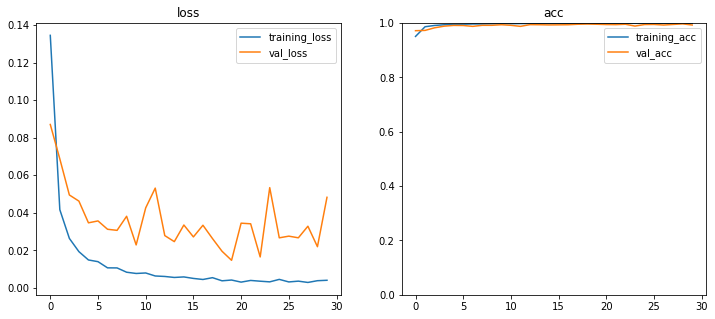

In [157]:
# 將訓練過程做視覺化的呈現
train_history = ['loss', 'val_loss', 'acc', 'val_acc']
name_history = ['training_loss', 'val_loss', 'training_acc', 'val_acc']

plt.figure(figsize=(12, 5))
for eachx, eachy, i in zip(train_history, name_history, range(4)):
    if i % 2 == 0:
        plt.subplot(1, 2, i//2+1)
    l_x = len(history.history[eachx])
    plt.plot(np.arange(l_x), history.history[eachx], label=eachy)
    plt.legend(loc='best')
    plt.title(eachy.split('_')[1])
    if i>2:
        plt.ylim((0, 1))
plt.show()

#### Model evaluation

In [158]:
model = keras.models.load_model('./Model/model-logs/effnet_model-best-model.h5')

In [173]:
valid_pred = model.predict_generator(valid_generator)
valid_pred = valid_pred.argmax(-1)

In [174]:
valid_list.loc[:, 'generator_label'] = valid_list['label'].map(valid_generator.class_indices).values

- #### Accuracy

In [175]:
print('Accuracy:', accuracy_score(valid_list['generator_label'], valid_pred))

Accuracy: 0.9968152866242038


- #### Confusion matrix

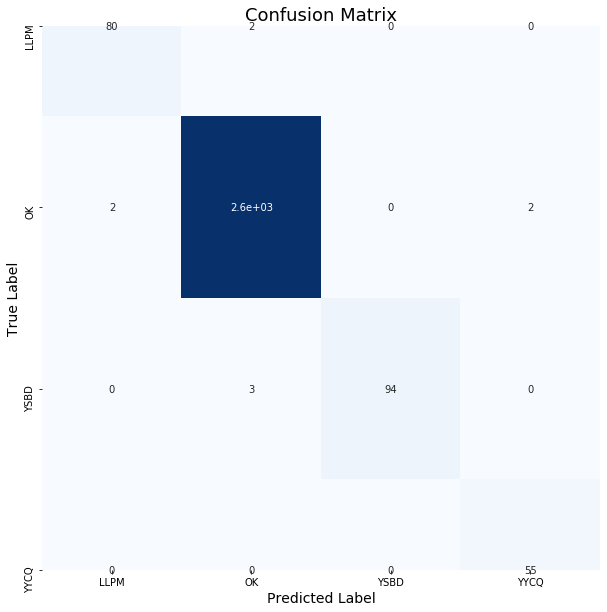

In [176]:
matrix = confusion_matrix(valid_list['generator_label'], valid_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues", robust=True,
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

- #### Recall

In [177]:
dict(zip(valid_generator.class_indices.keys(), recall_score(valid_list['generator_label'], valid_pred, average=None)))

{'LLPM': 0.975609756097561,
 'OK': 0.9984567901234568,
 'YSBD': 0.9690721649484536,
 'YYCQ': 1.0}